# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [564]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
from math import sqrt


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [565]:
# Reading the data

data=pd.read_csv("C:\\Users\\tapan\\Downloads\\day (1).csv")

In [566]:
# Checking the shape of data

data.shape

(730, 16)

In [567]:
# checking the size of data

data.size

11680

In [568]:
# Checking how data looks

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [569]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [570]:
# Checking the information of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [571]:
# Checking basic statistics of the data

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [572]:
# Checking for null values in the data

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Insights : There are no null values in the dataset

# Duplicate values

In [573]:
# Checking for duplicate values in the dataframe

data_dup = data

data_dup.drop_duplicates(subset=None, inplace=True)
data_dup.shape

(730, 16)

## Insights : Since the shape of both the dataframe df & df_dup is same, it can be concluded that there are no duplicates in the dataframe.

# Dropping columns not important

### Instant columns - as it is index
### dteday column - as it is having same data as year
### casual column - as we know casual + registered = cnt
### registered column - as we know casual+registered = cnt

In [574]:
# Dropping the above columns

data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [575]:
# Checking the database after removing the column

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [576]:
# Checking the shape of the database

data.shape

(730, 12)

# Encoding & Visualisation of the dataset

We are encoding season column as (1 : spring, 2 : summer , 3 : fall , 4 : winter)

We are encoding month column as ( 1 : Jan , 2 : Feb , 3 : Mar , 4 : Apr , 5 : May , 6 : June , 7 : July , 8: Aug , 9 : Sep , 10 : Oct , 11 : Nov , 12 : Dec)

We are encoding weathersit columns as (1 : Clear_Few Clouds , 2 : Misty_clouds , 3 : Light rain_Light snow_Thunderstorm , 4 : Heavy Rain_Ice Pallets_Thunderstorm_Mist)

We are encoding weekday coulmn as ( 0 : Sunday , 1 : Monday , 2 : Tuesday , 3 : Wednesday , 4 : Thrusday , 5 : Friday , 6 : Saturday )

In [577]:
# Performing encoding on the columns 

data['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
data['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

data['weathersit'].replace({1:"Clear",2:"Misty",3:"Light_rain",4:'Heavy_rain'},inplace=True)
data['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)


In [578]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<AxesSubplot:xlabel='season', ylabel='cnt'>

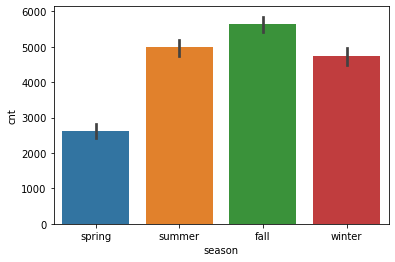

In [579]:
# Performing EDA on season column by ploting barplot

sns.barplot('season','cnt',data=data)

## Insight : The highest number of Bike Rentals is in fall season

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

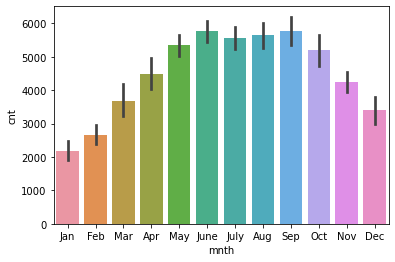

In [580]:
# Performing EDA on mnth column by ploting barplot

sns.barplot('mnth','cnt',data=data)

## Insight : The highest number of Bike Rentals is in the month Sep and lowest in the month of Jan.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

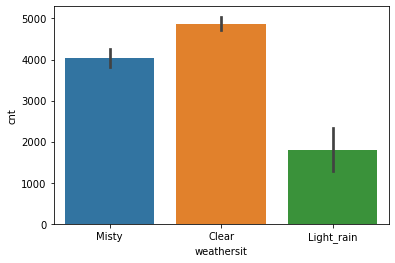

In [581]:
# Performing EDA on weathersit column by ploting barplot

sns.barplot('weathersit','cnt',data=data)

## Insights : As expected highest number of Bike Rentals are in when weather is clear

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

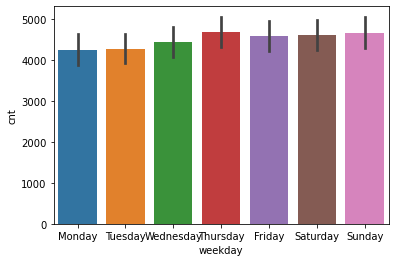

In [582]:
# Performing EDA on weathersit column by ploting barplot

sns.barplot('weekday','cnt',data=data)

## Insights : Bike Rentals are highest on Saturdays and Sundays, maybe because they are weekends and people hire more Bike in order to travel in their Leisure time.

In [583]:
data[['temp','atemp','hum','windspeed','cnt']]=data[['temp','atemp','hum','windspeed','cnt']].apply(pd.to_numeric)


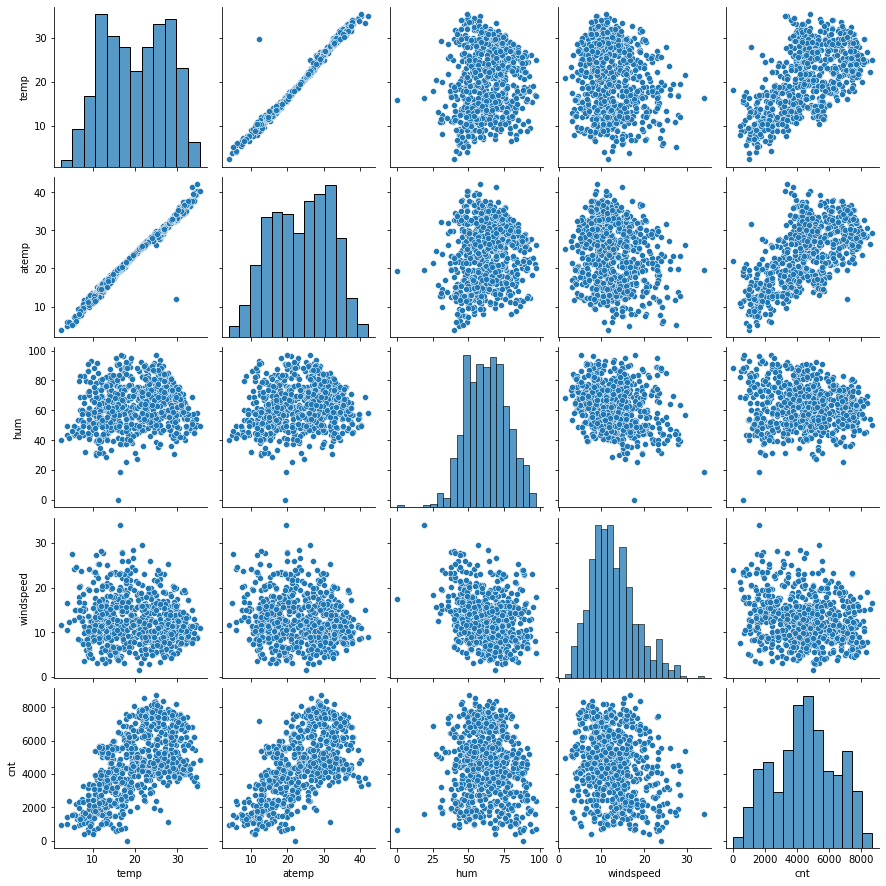

In [584]:
sns.pairplot(data, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

## Insights : It is evident from the above pairplot that there is a relationship between temp and atemp. 

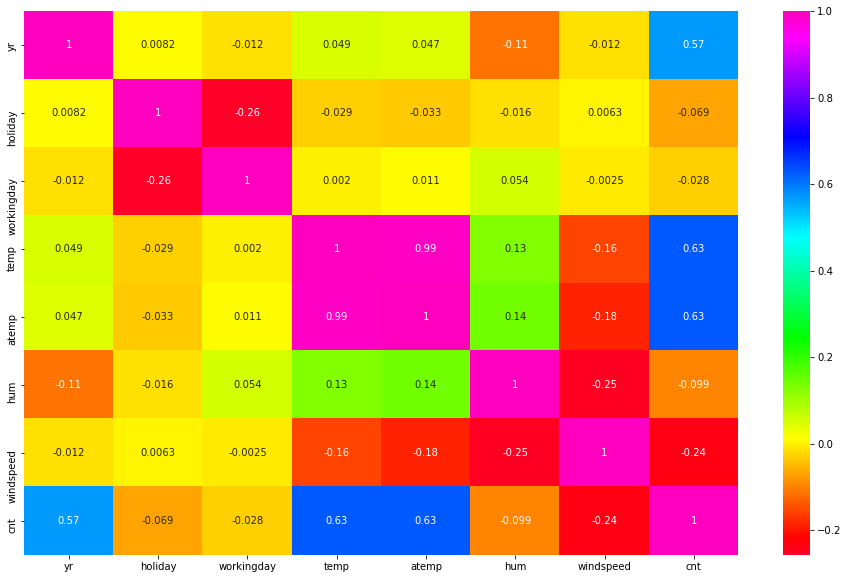

In [585]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="gist_rainbow")
plt.show()


## Insights : From the above heatmap can be concluded that corr b/w temp is atemp is 0.99 which is very high, hence we will drop atemp.

In [586]:
data.drop('atemp',axis=1,inplace=True)

# Dealing Categorical Variables (Creating Dummies)

In [587]:
seasons = pd.get_dummies(data['season'],drop_first=True)

working_day = pd.get_dummies(data['workingday'],drop_first=True)

weather= pd.get_dummies(data['weathersit'],drop_first=True)

month= pd.get_dummies(data['mnth'],drop_first=True)

week_day= pd.get_dummies(data['weekday'],drop_first=True)

In [588]:
data= pd.concat([data,seasons,working_day,weather,month,week_day],axis=1)

In [589]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,Misty,14.110847,80.5833,10.749882,...,0,0,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [590]:
data.drop(['season','workingday','weathersit','weekday','mnth'],axis=1,inplace=True)

In [591]:
data.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,1,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,14.110847,80.5833,10.749882,985,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,69.6087,16.652113,801,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,8.050924,43.7273,16.636703,1349,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8.200000,59.0435,10.739832,1562,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,43.6957,12.522300,1600,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Splitting the Data into Training and Testing Sets

In [592]:
np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [593]:
data_train.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,1,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,19.201653,55.8333,12.208807,7534,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,29.246653,70.4167,11.083475,7216,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
426,1,0,16.980847,62.1250,10.792293,4066,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,10.489153,48.3333,23.500518,1796,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,15.443347,48.9583,8.708325,4220,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [594]:
data_test.head()

,yr,holiday,temp,hum,windspeed,cnt,spring,summer,winter,1,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,29.793347,63.7917,5.459106,6043,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,32.082500,59.2083,7.625404,6211,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,19.270000,81.2917,13.250121,2659,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0,31.433347,42.4167,13.417286,4780,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [595]:
#
scaler= StandardScaler()
num_vars=['temp','hum','windspeed','cnt']

data_train[num_vars]= scaler.fit_transform(data_train[num_vars])

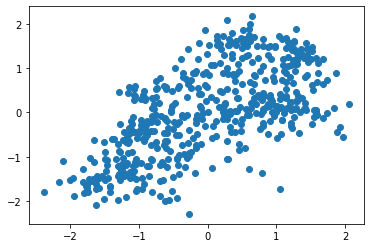

In [596]:
plt.scatter('temp','cnt',data=data_train)

# Dividing into X and y sets for Model Building

In [597]:
y_train = data_train.pop('cnt')
X_train = data_train

# Building the Model

In [598]:
#Rfe with output number of variable - 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) 
rfe = rfe.fit(X_train, y_train)

In [599]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', False, 11),
 ('windspeed', False, 6),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 (1, False, 7),
 ('Light_rain', True, 1),
 ('Misty', True, 1),
 ('Aug', False, 14),
 ('Dec', False, 2),
 ('Feb', False, 4),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 18),
 ('Mar', False, 19),
 ('May', False, 10),
 ('Nov', True, 1),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Monday', False, 13),
 ('Saturday', False, 8),
 ('Sunday', False, 9),
 ('Thursday', False, 17),
 ('Tuesday', False, 12),
 ('Wednesday', False, 15)]

In [600]:

col = X_train.columns[rfe.support_]

In [601]:
# Creating X_train_rfe dataframe
X_train_rfe = X_train[col]

In [602]:
# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [603]:
# Linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [604]:
#Summary of the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.68e-181
Time:                        14:21:09   Log-Likelihood:                -281.22
No. Observations:                 510   AIC:                             584.4
Df Residuals:                     499   BIC:                             631.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2908      0.043     -6.829      0.000      -0.374      -0.207
yr             1.0389      0.038     27.364      0.000       0.964       1.113
holiday       -0.4245      0.121     -3.503      0.001      -0.663      -0.186
temp           0.4668      0.032     14.755      0.000       0.405       0.529
spring        -0.5071      0.070     -7.218      0.000      -0.645      -0.369
winter         0.2899      0.061      4.740      0.000       0.170       0.410
Light_rain    -1.3461      0.114    -11.853      0.000      -1.569      -1.123
Misty         -0.3575      0.040     -8.834      0.000      -0.437      -0.278
July          -0.3022      0.080     -3.777      0.000      -0.459      -0.145
Nov           -0.1422      0.081     -1.758      0.079      -0.301       0.017
Sep            0.2830      0.073      3.897      0.000       0.140       0.426
==============================================================================
Omnibus:                       70.276   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.677
Skew:                          -0.682   Prob(JB):                     1.07e-41
Kurtosis:                       5.649   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [605]:
# Dropping 'Nov' as it is insignificant wit p value > 0.05
X_train1= X_train_rfe.drop('Nov',1)

In [606]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [607]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.16e-181
Time:                        14:21:17   Log-Likelihood:                -282.79
No. Observations:                 510   AIC:                             585.6
Df Residuals:                     500   BIC:                             627.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2970      0.043     -6.985      0.000      -0.381      -0.213
yr             1.0386      0.038     27.300      0.000       0.964       1.113
holiday       -0.4506      0.120     -3.740      0.000      -0.687      -0.214
temp           0.4738      0.031     15.063      0.000       0.412       0.536
spring        -0.4934      0.070     -7.051      0.000      -0.631      -0.356
winter         0.2486      0.057      4.393      0.000       0.137       0.360
Light_rain    -1.3382      0.114    -11.768      0.000      -1.562      -1.115
Misty         -0.3546      0.041     -8.752      0.000      -0.434      -0.275
July          -0.3065      0.080     -3.824      0.000      -0.464      -0.149
Sep            0.2932      0.073      4.042      0.000       0.151       0.436
==============================================================================
Omnibus:                       66.905   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.340
Skew:                          -0.661   Prob(JB):                     2.29e-38
Kurtosis:                       5.532   Cond. No.                         8.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## All the variables are less than 0.05 p-value.

In [609]:
X_train3= X_train2.drop('const',axis=1)

In [610]:
vif = pd.DataFrame()
X = X_train3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,2.41
3,spring,2.21
0,yr,1.67
4,winter,1.55
6,Misty,1.36
7,July,1.34
8,Sep,1.16
5,Light_rain,1.05
1,holiday,1.04


## VIF of all the variables is less than 5.

In [611]:
y_train_pred = lm1.predict(X_train2)

Text(0.5, 0, 'Errors')

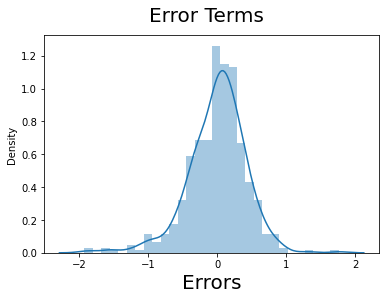

In [612]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 20) 

In [613]:
# Making prediction
num_vars=['temp','hum','windspeed','cnt']

data_test[num_vars]= scaler.transform(data_test[num_vars])

In [614]:
# Dividing into X_test & y_test
y_test = data_test.pop('cnt')
X_test = data_test

In [615]:
# Making Prediction

# Creating X_test1 in order to drop variables from X_test
X_test1 = X_test[X_train3.columns]

# Adding a constant variable in X_test1 
X_test1 = sm.add_constant(X_test1)

In [616]:
y_test_pred = lm1.predict(X_test1)

Text(0, 0.5, 'Predictions')

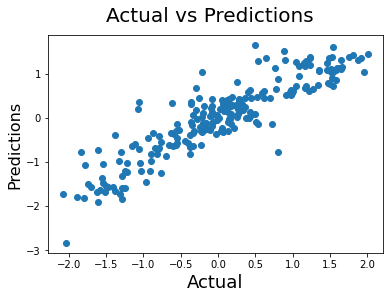

In [617]:
# Model Evaluation
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)               
plt.xlabel('Actual', fontsize=18)                          
plt.ylabel('Predictions', fontsize=16)

In [618]:
r2_score(y_test, y_test_pred)

0.8092200832884747